In [4]:
from multi_round.surface_code import * # defines surface code related API
from multi_round.surface_code_dataset import * # generate data

In [10]:
def compute_z_logical_error_count_mwpm(distance, num_round, num_shots, physical_err_prob):
    code = surfaceCode(distance)
    data = []
    test_sample, test_label = gene_dataset(code, num_round, physical_err_prob, num_shots, retrieve_samples=data)
    num_errors = 0
    data_qubits = code.data_qubits
    matching = code.get_z_signal_matching_graph(rounds=num_round)
    for k in range(num_shots):
        syndrome, noise = disassemble_sample(data[k], 1)
        prediction = matching.decode(syndrome)
        flip = code.x_error_decoding_failure(prediction, noise)
        num_errors += flip
    return num_errors

def get_mwpm_logical_error_rates(distance, noise_list, num_shots):
    logical_error_rates = []
    for noise in noise_list:
        logical_error_rates.append(compute_z_logical_error_count_mwpm(distance, distance-1, num_shots, noise)/num_shots)
    return logical_error_rates

In [11]:
num_shot = 1000

noises = [0.001,0.005,0.01,0.015,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.3]
mwpm_rates_d3 = get_mwpm_logical_error_rates(3, noises, num_shot)

In [12]:
noises = [0.001,0.005,0.01,0.015,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.3]
mwpm_rates_d5 = get_mwpm_logical_error_rates(5, noises, num_shot)

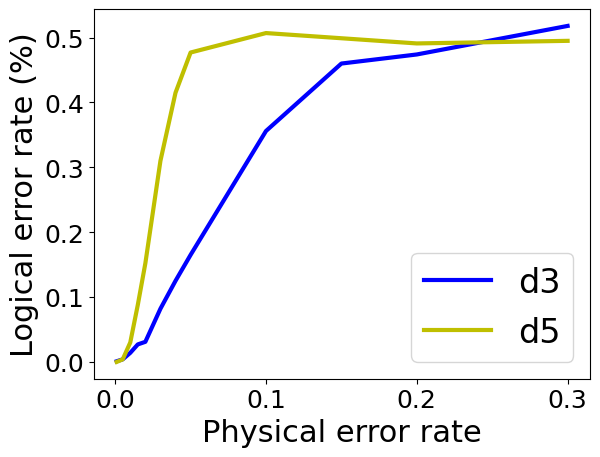

In [13]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

font = {'size': 18}
matplotlib.rcParams['pdf.fonttype'] = 42

matplotlib.rc('font', **font)

noises = [0.001,0.005,0.01,0.015,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.3]
plt.plot(noises, mwpm_rates_d3, 'b', label='d3', linewidth=3)
plt.plot(noises, mwpm_rates_d5, 'y', label='d5', linewidth=3)
plt.ylabel('Logical error rate (%)', fontsize=22)
plt.xlabel('Physical error rate', fontsize=22)
plt.legend(prop={'size': 24})
plt.show()